## PART 1: REDDIT DATA COLLECTION 

PRAW, an acronym for “Python Reddit API Wrapper”, is a python package that allows for simple access to reddit's API. Here, PRAW is used to scrape from r/India, Reddit's official subreddit for India.

### ABOUT THE DATA:

The posts of 12 categories have been scraped from r/India. These categories are: (In no particular order)
1. Sports
2. Entertainment
3. Science-Technology
4. COVID-19
5. Politics
6. Non-Political
7. AskIndia
8. Finance
9. Economy
10. CAA-NRC-NPC
11. Photography
12. Reddiquette

### PYTHON SCRIPT TO SCRAPE THE DATA:

## PART 2: EXPLORATORY DATA ANALYSIS 

In [2]:
#Importing necessary Libraries:
import pandas as pd 
import numpy as np
import sklearn
import nltk
import gensim
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Loading Dataframe 
df=pd.read_csv("/home/smriti/MIDAS/rIndia2.csv")
df.head()

,flair,title,score,id,url,comms_num,created,body,author,comments
0,Coronavirus,Coronavirus: How Shashi Tharoor Spent His MP F...,280,fwcvid,https://www.ndtv.com/kerala-news/coronavirus-h...,34,1.586258e+09,NaN,GuruDev1000,"This guy seems like a good PM candidate, does..."
1,Coronavirus,"Muslims Spitting on Food, Hiding in Mosques to...",144,fwf28y,https://www.news18.com/news/buzz/muslims-spitt...,8,1.586268e+09,NaN,dlisfyn,Sounds like they picked up a reddit post a fe...
2,Coronavirus,Explained: Sampling bias drove sensationalist ...,157,fwe3n9,https://scroll.in/article/958392/explained-sam...,30,1.586263e+09,NaN,Fabulous-Rice,> [Several](https://twitter.com/MumbaiPolice...
3,Coronavirus,'Fear people in quarantine will be injected wi...,60,fwiwpk,https://www.firstpost.com/health/fear-people-i...,1,1.586288e+09,NaN,OrneryReflection,Because of these idiots the whole community g...
4,Coronavirus,Coronavirus & Hydroxychloroquine -- India Cuts...,132,fwcud7,https://www.nationalreview.com/news/india-cuts...,19,1.586258e+09,NaN,im-the-stig,"I don't really like Trump or Modi , but I sup..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 10 columns):
flair        2127 non-null object
title        2127 non-null object
score        2127 non-null int64
id           2127 non-null object
url          2127 non-null object
comms_num    2127 non-null int64
created      2127 non-null float64
body         1198 non-null object
author       2127 non-null object
comments     1934 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 166.2+ KB


Here, we observe that almost half of the posts don't have a body and a few of them don't have comments too. Since we can't just drop the rows/columns that have one of the parameters as NaN as that would further reduce our training dataset, let's replace it by another value. 

In [5]:
df['body'].fillna('NotApplicable', inplace=True)
df['comments'].fillna('NotApplicable',inplace=True)
df.head()

,flair,title,score,id,url,comms_num,created,body,author,comments
0,Coronavirus,Coronavirus: How Shashi Tharoor Spent His MP F...,280,fwcvid,https://www.ndtv.com/kerala-news/coronavirus-h...,34,1.586258e+09,NotApplicable,GuruDev1000,"This guy seems like a good PM candidate, does..."
1,Coronavirus,"Muslims Spitting on Food, Hiding in Mosques to...",144,fwf28y,https://www.news18.com/news/buzz/muslims-spitt...,8,1.586268e+09,NotApplicable,dlisfyn,Sounds like they picked up a reddit post a fe...
2,Coronavirus,Explained: Sampling bias drove sensationalist ...,157,fwe3n9,https://scroll.in/article/958392/explained-sam...,30,1.586263e+09,NotApplicable,Fabulous-Rice,> [Several](https://twitter.com/MumbaiPolice...
3,Coronavirus,'Fear people in quarantine will be injected wi...,60,fwiwpk,https://www.firstpost.com/health/fear-people-i...,1,1.586288e+09,NotApplicable,OrneryReflection,Because of these idiots the whole community g...
4,Coronavirus,Coronavirus & Hydroxychloroquine -- India Cuts...,132,fwcud7,https://www.nationalreview.com/news/india-cuts...,19,1.586258e+09,NotApplicable,im-the-stig,"I don't really like Trump or Modi , but I sup..."


In [6]:
#Let's check the datatypes within the dataframe
df.dtypes

flair         object
title         object
score          int64
id            object
url           object
comms_num      int64
created      float64
body          object
author        object
comments      object
dtype: object

Now, a crucial step: Looking at the above columns, it is clear that not all of them are required for the purpose of predicting which flair they belong to. The score, the number of comments, the id of the post and the comments pertaining to the post provide no information about its flair. So we can safely get rid of these columns. 

Furthermore, the author and the date of posting might provide some insight, but that insight might be misleading too. For instance, if a person posts about politics most of the time,it doesn't entail that the user will not post about any other topic at some other time. Thus, we can get rid of these columns too. 

In [7]:
#Dropping Irrelevant columns:
df=df.drop(['score','id','comms_num','created','author','comments'],axis=1)

In [8]:
df.head()

,flair,title,url,body
0,Coronavirus,Coronavirus: How Shashi Tharoor Spent His MP F...,https://www.ndtv.com/kerala-news/coronavirus-h...,NotApplicable
1,Coronavirus,"Muslims Spitting on Food, Hiding in Mosques to...",https://www.news18.com/news/buzz/muslims-spitt...,NotApplicable
2,Coronavirus,Explained: Sampling bias drove sensationalist ...,https://scroll.in/article/958392/explained-sam...,NotApplicable
3,Coronavirus,'Fear people in quarantine will be injected wi...,https://www.firstpost.com/health/fear-people-i...,NotApplicable
4,Coronavirus,Coronavirus & Hydroxychloroquine -- India Cuts...,https://www.nationalreview.com/news/india-cuts...,NotApplicable


Next, it's a good idea to check if there were really 200 posts scraped corresponding to each flair in accordance with the script written in PART-1.

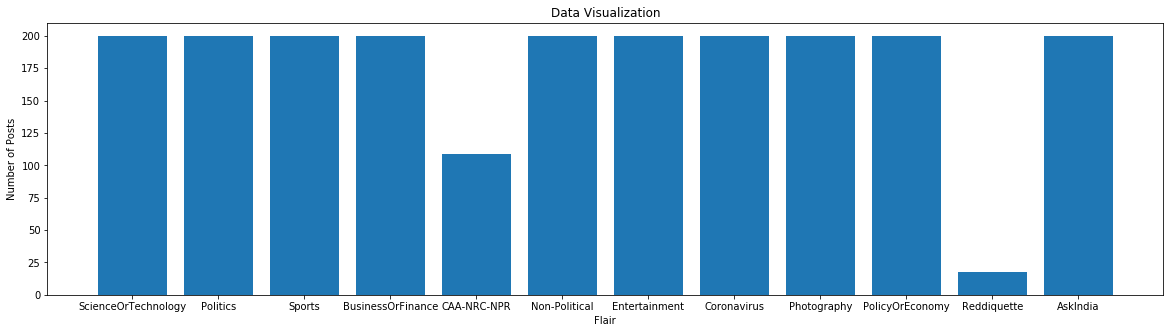

In [9]:
mylist=df['flair'].value_counts()
mydict=dict(mylist)
plt.figure(figsize=(20,5))
plt.bar(*zip(*mydict.items()))
plt.xlabel("Flair")
plt.ylabel("Number of Posts")
plt.title("Data Visualization")
plt.show()

The difference in the expected value and actual value corresponding to some columns is probably owing to the lack of posts with respect to that flair. This means that the model may find some difficulty in classifying posts as [R]eddiquette.

Just for our reference, let us find out the ratio of the posts that have a body. This is because the classifier will have more data to base its decision on in case of posts that have a title and a body. 

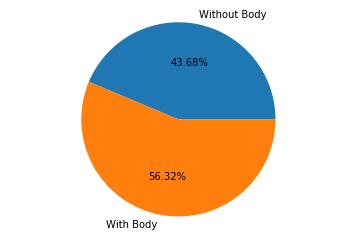

In [10]:
x=[(df['body']=='NotApplicable').sum(),(df['body']!='NotApplicable').sum()]
ll=['Without Body','With Body']
fig = plt.figure()
plt.pie(x,explode=None,labels=ll,autopct='%1.2f%%')
plt.axis('equal')
plt.show()

So, a little over 50% of the posts have a body. 

## PART 3: BUILDING A FLAIR DETECTOR 

At this point,the structure and details of the scraped data are pretty clear. It is known that almost all categories of flairs have 200 posts in the dataset, almost 60% of the posts have additional text ie, a body and that none of our cells have a null value. With that, let's start building the flair detector.

A flair detector is essentially a multiclass text classifier. To build one, the text must be preprocessed. Then, an algorithm should be picked, based on its performance in classifying the posts correctly. 

### PREPROCESSING TEXT

Steps involved:
1. Remove html 
2. Remove punctuation, extra white spaces and special characters 
3. Convert all text to lower case
4. Tokenize 
5. Removing StopWords
6. Lemmatize 

Since Removing html links seems to be a key step in text preprocessing, let us get rid of the column of urls in our dataframe for now. If the classifier performs poorly, we can always add the column and train the classifier again.

In [11]:
df2=df.drop(['url'],axis=1)

For the purpose of reusability, we define a text cleaning function as shown below:

In [12]:
specialSymbols= re.compile('[/(){}\[\]\|@,;]')
otherSymbols=re.compile('[^0-9a-z #+_]')
STOPWORDS=set(stopwords.words('english'))

In [13]:
df2['title']=df2['title'].astype(str)
df2['body']=df2['body'].astype(str)
df2['flair']=df2['flair'].astype(str)

In [14]:
def clean_text(text):
    #Convert to lowercase
    text=text.lower()
    #Remove punctuation and special symbols
    text=specialSymbols.sub(' ', text)
    text=otherSymbols.sub('', text) 
    #Remove Stopwords
    text=' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

In [15]:
df2['title']=df2['title'].apply(clean_text)
df2['body']=df2['body'].apply(clean_text)
df2['flair']=df2['flair'].apply(clean_text)

In [16]:
#Tokenize and convert to lower case 
from nltk.tokenize import RegexpTokenizer 
tokenizer=RegexpTokenizer(r'\w+')
df2['title']=df2['title'].apply(lambda x: tokenizer.tokenize(x))
df2['body']=df2['body'].apply(lambda x: tokenizer.tokenize(x))
df2['flair']=df2['flair'].apply(lambda x: tokenizer.tokenize(x))

The only thing left, in terms of preprocessing, is lemmatization. There is always a choice between stemming and lemmatization. The difference between the two is that the former focuses on dropping the suffixes of words. Using stemming, the words smart, smarter and smartest are treated as the same word. On the other hand, Lemmatization focuses on the morphology of the words. Good and Better are group under the same category using lemmatization. 

Here, Lemmatization seems like the better choice because we are grouping texts into categories. The meaning of the words more than their grammatical form. 

In [17]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
df2['body']=df2['body'].apply(lambda x: lemmatizer.lemmatize(str(x)))
df2['title']=df2['title'].apply(lambda x: lemmatizer.lemmatize(str(x)))

In [18]:
df2.head()

,flair,title,body
0,[coronavirus],"['coronavirus', 'shashi', 'tharoor', 'spent', ...",['notapplicable']
1,[coronavirus],"['muslims', 'spitting', 'food', 'hiding', 'mos...",['notapplicable']
2,[coronavirus],"['explained', 'sampling', 'bias', 'drove', 'se...",['notapplicable']
3,[coronavirus],"['fear', 'people', 'quarantine', 'injected', '...",['notapplicable']
4,[coronavirus],"['coronavirus', 'hydroxychloroquine', 'india',...",['notapplicable']


### MODEL BUILDING AND TESTING

Now that the data has been properly preprocessed, the testing of different models can be done to see which algorithm has the highest efficiency. 

In [19]:
#Import necessary libraries
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
%matplotlib inline

In [20]:
#Make a df with string type to use with Label Encoder
df3=df2
df3['title']=df3['title'].astype(str)
df3['flair']=df3['flair'].astype(str)
df3['body']=df3['body'].astype(str)

In [21]:
#Splitting Dataset in Training and Testing sets
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df3['title'],df3['flair'],test_size=0.3)

In [22]:
#Encoding to convert Y values into numeric form 
Encoder=LabelEncoder()
Train_Y=Encoder.fit_transform(Train_Y)
Test_Y=Encoder.fit_transform(Test_Y)

In [23]:
#Using TFIDF Vectorizer to turn a collection of words into feature vectors 
Tfidf_vect=TfidfVectorizer(max_features=2000)
Tfidf_vect.fit(df3['title'])
#print(Tfidf_vect.vocabulary_)
Train_X_Tfidf=Tfidf_vect.transform(Train_X)
Test_X_Tfidf=Tfidf_vect.transform(Test_X)

In [24]:
#MODEL 1: NAIVE BAYES
Naive=naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
predictions_NB = Naive.predict(Test_X_Tfidf)
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  65.41471048513301


In [25]:
#Finding F1 Score
f1_score(Test_Y, predictions_NB, average='micro')

0.6541471048513302

In [26]:
#MODEL 2: SVM WITH LINEAR KERNEL 
SVM=svm.SVC(C=1.0,kernel='linear',degree=3,gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
predictions_SVM=SVM.predict(Test_X_Tfidf)
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  67.2926447574335


SVM performed marginally better than the Naive Bayes Classifier. 

In [27]:
#Finding F1 Score
f1_score(Test_Y, predictions_SVM, average='micro')

0.672926447574335

In [28]:
#MODEL 3: ONE-VS-ALL CLASSIFICATION USING LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(random_state=0).fit(Train_X_Tfidf,Train_Y)
predictions_LR=LR.predict(Test_X_Tfidf)
print("LR Accuracy Score -> ",accuracy_score(predictions_LR, Test_Y)*100)

LR Accuracy Score ->  68.85758998435054


In [29]:
#Finding F1 Score
f1_score(Test_Y, predictions_LR, average='micro')

0.6885758998435054

So, the logistic regression model, which follows one vs all classification for multiclass classification purposes, outperforms the other models we have build so far. 

In [30]:
#MODEL 4: K NEAREST NEIGHBOURS 
from sklearn.neighbors import KNeighborsClassifier 
KNN=KNeighborsClassifier(n_neighbors=50).fit(Train_X_Tfidf,Train_Y) 
predictions_KNN=KNN.predict(Test_X_Tfidf)
print("KNN Accuracy Score -> ",accuracy_score(predictions_KNN, Test_Y)*100)

KNN Accuracy Score ->  59.780907668231606


In [31]:
#Finding F1 Score
f1_score(Test_Y, predictions_KNN, average='micro')

0.5978090766823161

In [32]:
#MODEL 5: DECISION TREE
from sklearn.tree import DecisionTreeClassifier 
DTC=DecisionTreeClassifier(max_depth=75).fit(Train_X_Tfidf,Train_Y) 
predictions_DTC=DTC.predict(Test_X_Tfidf)
print("Decision Tree Accuracy Score -> ",accuracy_score(predictions_DTC, Test_Y)*100)

Decision Tree Accuracy Score ->  65.10172143974961


In [33]:
#Finding F1 Score
f1_score(Test_Y, predictions_DTC, average='micro')

0.651017214397496

In [34]:
#MODEL 6: RANDOM FOREST 
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=150)
RF.fit(Train_X_Tfidf,Train_Y) 
predictions_RF=RF.predict(Test_X_Tfidf)
print("Random Forest Accuracy Score -> ",accuracy_score(predictions_RF, Test_Y)*100)

Random Forest Accuracy Score ->  67.2926447574335


In [35]:
#Finding F1 Score
f1_score(Test_Y, predictions_RF, average='micro')

0.672926447574335

In [36]:
#MODEL 7: RIDGE CLASSIFIER
from sklearn.linear_model import RidgeClassifier
RC=RidgeClassifier()
RC.fit(Train_X_Tfidf,Train_Y) 
predictions_RC=RC.predict(Test_X_Tfidf)
print("Ridge Classifier Score -> ",accuracy_score(predictions_RC, Test_Y)*100)

Ridge Classifier Score ->  67.91862284820031


In [37]:
#MODEL 8: EXTRA TREES CLASSIFIER
from sklearn.ensemble import ExtraTreesClassifier
ETC=ExtraTreesClassifier(n_estimators=150)
ETC.fit(Train_X_Tfidf,Train_Y) 
predictions_ETC=ETC.predict(Test_X_Tfidf)
print("Extra Trees Accuracy Score -> ",accuracy_score(predictions_ETC, Test_Y)*100)

Extra Trees Accuracy Score ->  66.04068857589984


In [38]:
#MODEL 9: EXTRA TREE CLASSIFIER
from sklearn.tree import ExtraTreeClassifier
ET=ExtraTreeClassifier()
ET.fit(Train_X_Tfidf,Train_Y)
predictions_ET=ET.predict(Test_X_Tfidf)
print("Extra Tree Accuracy Score -> ",accuracy_score(predictions_ET, Test_Y)*100)

Extra Tree Accuracy Score ->  54.30359937402191


In [39]:
#MODEL 10: NEAREST CENTROID ACCURACY 
from sklearn.neighbors import NearestCentroid
NC=NearestCentroid()
NC.fit(Train_X_Tfidf,Train_Y) 
predictions_NC=NC.predict(Test_X_Tfidf)
print("Nearest Centroid Accuracy Score -> ",accuracy_score(predictions_NC, Test_Y)*100)

Nearest Centroid Accuracy Score ->  66.97965571205008


In [40]:
#MODEL 11: Passive Aggressive Classifier 
from sklearn.linear_model import PassiveAggressiveClassifier
PAC=PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-3)
PAC.fit(Train_X_Tfidf,Train_Y) 
predictions_PAC=PAC.predict(Test_X_Tfidf)
print("PAC Accuracy Score -> ",accuracy_score(predictions_PAC, Test_Y)*100)

PAC Accuracy Score ->  66.66666666666666


In [41]:
#MODEL 12: SGD Classifier
from sklearn import linear_model
SGD=linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
SGD.fit(Train_X_Tfidf,Train_Y)
predictions_SGD=SGD.predict(Test_X_Tfidf)
print("SGD Accuracy Score -> ",accuracy_score(predictions_SGD, Test_Y)*100)

SGD Accuracy Score ->  67.13615023474179


In [42]:
#MODEL 13: PERCEPTRON CLASSIFIER 
from sklearn.linear_model import Perceptron
PC=Perceptron(tol=1e-3, random_state=0)
PC.fit(Train_X_Tfidf,Train_Y)
predictions_PC=PC.predict(Test_X_Tfidf)
print("Perceptron Accuracy Score -> ",accuracy_score(predictions_PC, Test_Y)*100)

Perceptron Accuracy Score ->  61.03286384976526


In [43]:
#MODEL 14: GRADIENT BOOSTING CLASSIFIER 
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier(n_estimators=130)
GBC.fit(Train_X_Tfidf,Train_Y)
predictions_GBC=GBC.predict(Test_X_Tfidf)
print("GBC Accuracy Score -> ",accuracy_score(predictions_GBC, Test_Y)*100)

GBC Accuracy Score ->  64.63223787167449


Thus, we find that all the algorithms yield us an accuracy which is less than 70%. Let us see if we can achieve better scores using better models.

### USING BERT AS A MULTI-CLASS TEXT CLASSIFIER:

Bidirectional Encoder Representations from Transformers (BERT) is a technique for NLP (Natural Language Processing) pre-training developed by Google. Created and published in 2018, it is considered a state of the art NLP model. BERT uses bidirection training on Transformer and applies it to language modelling, so that the model has a deeper sense of context and lingual flow. Let us see how BERT performs in the task of flair detection.

### NOTE: Due to a software issue, ktrain and praw are incompatible with this version of jupyter notebook. Thus, I have uploaded this code as rawNB snippets instead of code snippets. However, this code is executable on any platform running python3.7.

### The script which I used for execution has been uploaded as Bert.py on this same repo.

Tfdata.csv is a file which has the same contents of rIndia2.csv, in a shuffled order. Shuffling was done using the following code so that divison into train and test sets becomes easier. 

### Here, we observe an accuracy of 97% and an F-Score of 0.80. Clearly, Bert is the best algorithm we have tried out so far.

Once the model is saved, it can be called and tested as per our requirements using the following code snippet:

### ERROR ANALYSIS:

Like any machine learning algorithm, Bert makes mistakes too. These are the following reasons Bert could provide an erroneous classification:

1. QUESTIONS IN ASK INDIA:
   Since the category of AskIndia is full of questions on rIndia, this classifier thinks all questions come under AskIndia. Thus, even a post titled "Is India capable of saving its hospitals so that its hospitals can save it?" will be classified as "AskIndia" as opposed to "Coronavirus".

2. MISUNDERSTANDING KEY WORDS IN SENTENCES:
   The classifier doesn't do that well with understanding context around some key words. For example, a post titled "A thrilling game of thrones" will be marked "Sports" as opposed to "Entertainment", because the classifier views the word 'game' as something that can only be related to sports.

3. ALTERNATIVE CONTEXT BASED PREDICTION: In certain cases, the classifier seems to be understanding the posy properly but categorizing it to belong to another class. For instance, the post titled " A Day with the Indian Womens’ Hockey Team" is categorized as 'Sports' by Bert, whereas on rIndia, it is categorized as 'Entertainment'. Clearly, neither of the classifications are actually incorrect. 
